# Classification of Images of clothing

**This notebook uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)**

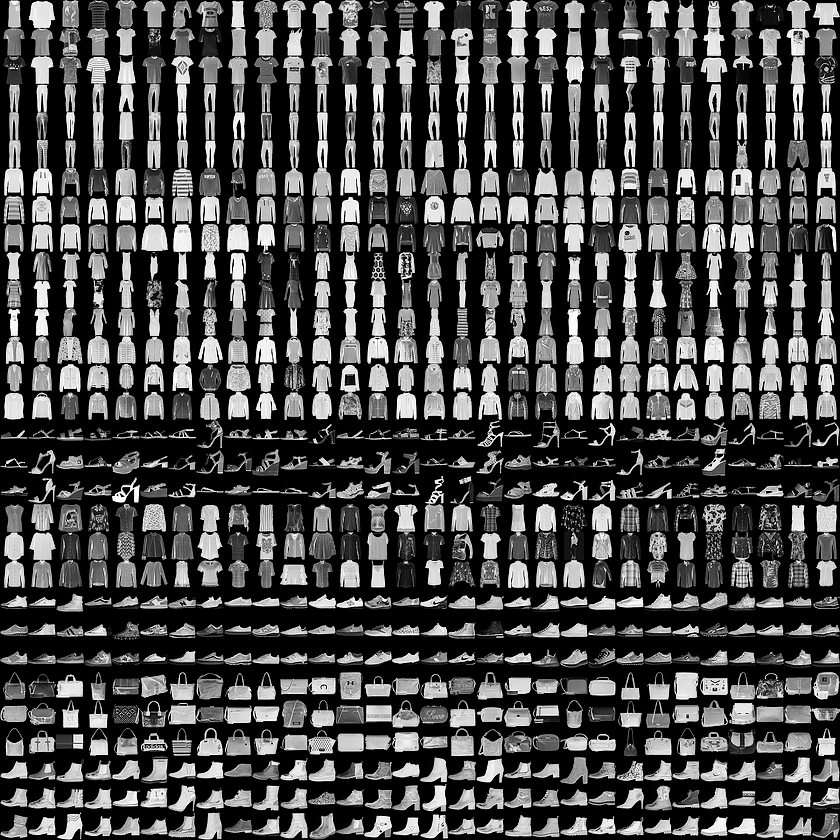

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

**Loading the dataset returns four NumPy arrays:
(1)The train_images and train_labels arrays are the training set—the data the model uses to learn.
(2)The model is tested against the test set, the test_images, and test_labels arrays.**

**Since the class names are not included with the dataset, store them here to use later when plotting the images**

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Explore the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Preprocess the data

**The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255**

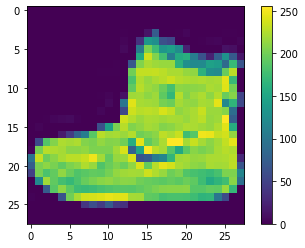

In [9]:
plt.imshow(train_images[0])
plt.colorbar() # For range

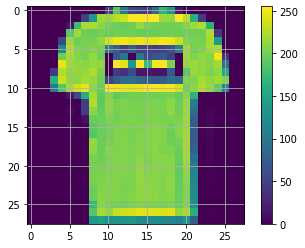

In [10]:
plt.imshow(train_images[1])
plt.colorbar() # For range
plt.grid()

**Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way**

In [11]:
train_images = train_images/255.0
test_images = test_images/255.0

**To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image**

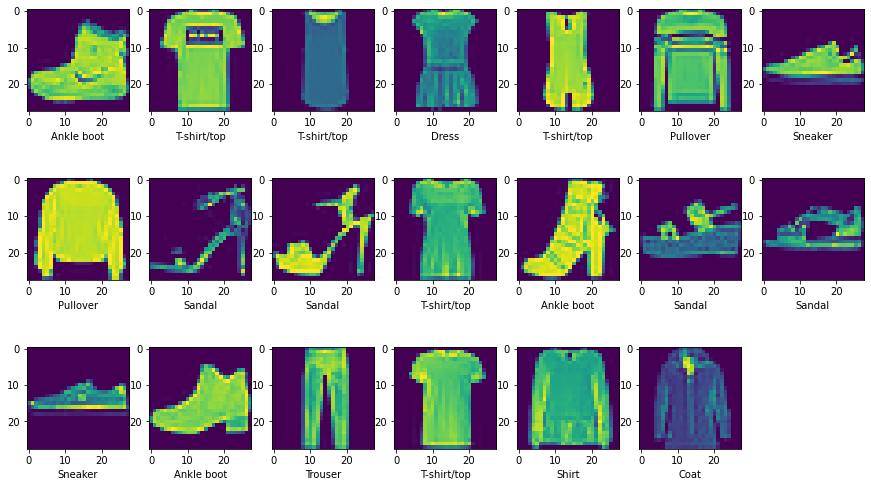

In [12]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,7,i+1)
    #plt.xticks([])
    #plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

# Build the model
**Building the neural network requires configuring the layers of the model, then compiling the model.**

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array   (28 by 28 pixels) to a one-dimensional array (28 * 28 = 784 pixels). This layer has no parameters to learn, it only reformats the data.**

**After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.**

# Compiling the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Fit the model 
model.fit(train_images, train_labels, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 28s 460us/sample - loss: 0.5012 - accuracy: 0.8249
Epoch 2/15
60000/60000 [==============================] - 15s 250us/sample - loss: 0.3765 - accuracy: 0.8646
Epoch 3/15
60000/60000 [==============================] - 11s 181us/sample - loss: 0.3415 - accuracy: 0.8748
Epoch 4/15
60000/60000 [==============================] - 11s 185us/sample - loss: 0.3158 - accuracy: 0.8842
Epoch 5/15
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2978 - accuracy: 0.8906
Epoch 6/15
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2863 - accuracy: 0.8942
Epoch 7/15
60000/60000 [==============================] - 11s 185us/sample - loss: 0.2727 - accuracy: 0.8991
Epoch 8/15
60000/60000 [==============================] - 11s 183us/sample - loss: 0.2613 - accuracy: 0.9026
Epoch 9/15
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2520 - accuracy: 0.9

# Evaluating the model Accuracy

In [16]:
# Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('Test accuracy:', test_acc)

10000/10000 - 2s - loss: 0.3460 - accuracy: 0.8857
Test accuracy: 0.8857


In [17]:
# Prediction
#The model have linear outputs, logits. Attach a softmax layer to convert the logits to probabilities
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()]) 

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([4.7328683e-07, 7.0885951e-13, 2.5224875e-10, 4.6791070e-13,
       3.3081463e-10, 6.8924983e-04, 1.6851388e-09, 5.1302514e-03,
       6.4798806e-09, 9.9418008e-01], dtype=float32)

In [20]:
# To find which label has the highest confidence value
np.argmax(predictions[0])

9

In [21]:
#Examining the test label shows that this classification is correct
test_labels[0]

9

In [22]:
predictions[1]

array([3.4871884e-04, 5.6629804e-17, 9.9823594e-01, 6.5427253e-10,
       4.7572827e-04, 5.6373504e-13, 9.3965500e-04, 7.0473866e-21,
       3.7134039e-11, 4.8328079e-16], dtype=float32)

In [23]:
# To find which label has the highest confidence value
np.argmax(predictions[1])

2

In [24]:
#Examining the test label shows that this classification is correct
test_labels[1]

2

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#008000')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions
**As the model is trained, we can use it to make predictions about some images.
Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.**

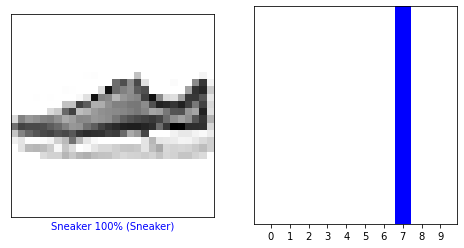

In [26]:
i = 9  #Image number
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

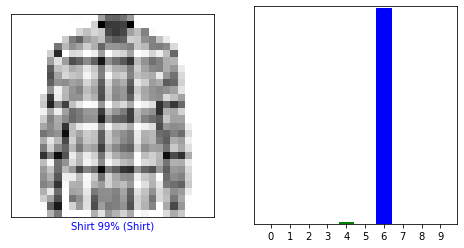

In [27]:
i = 7   #image number
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

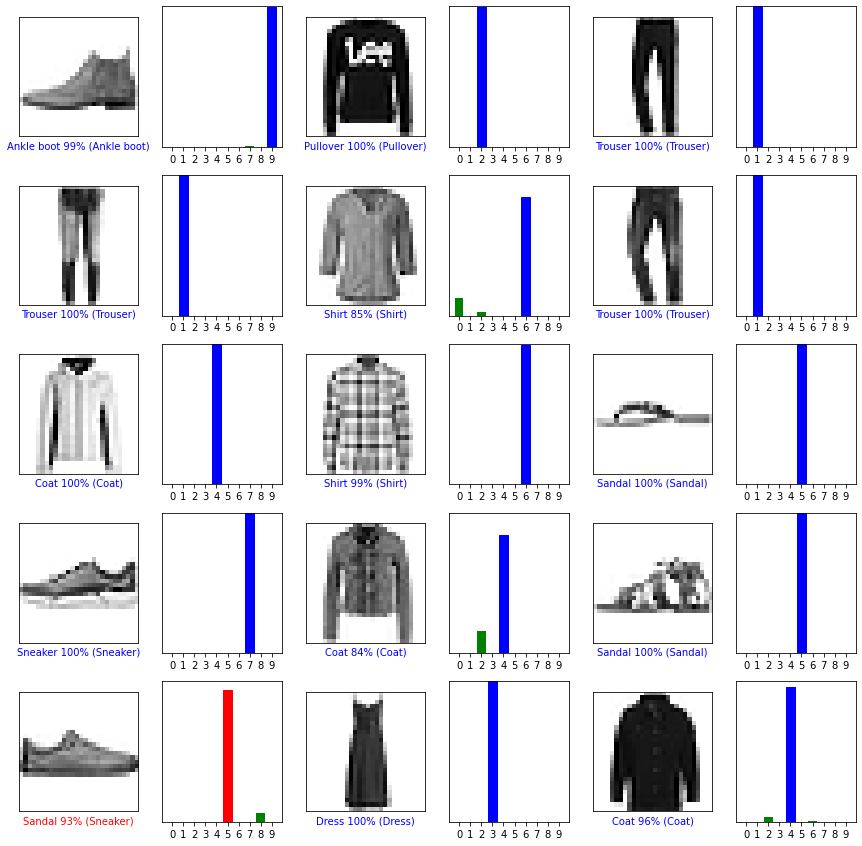

In [28]:
# Plot the first X test images, their predicted labels, and the true labels
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,2*3,2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(5,2*3,2*i+2)
    plot_value_array(i, predictions[i], test_labels)

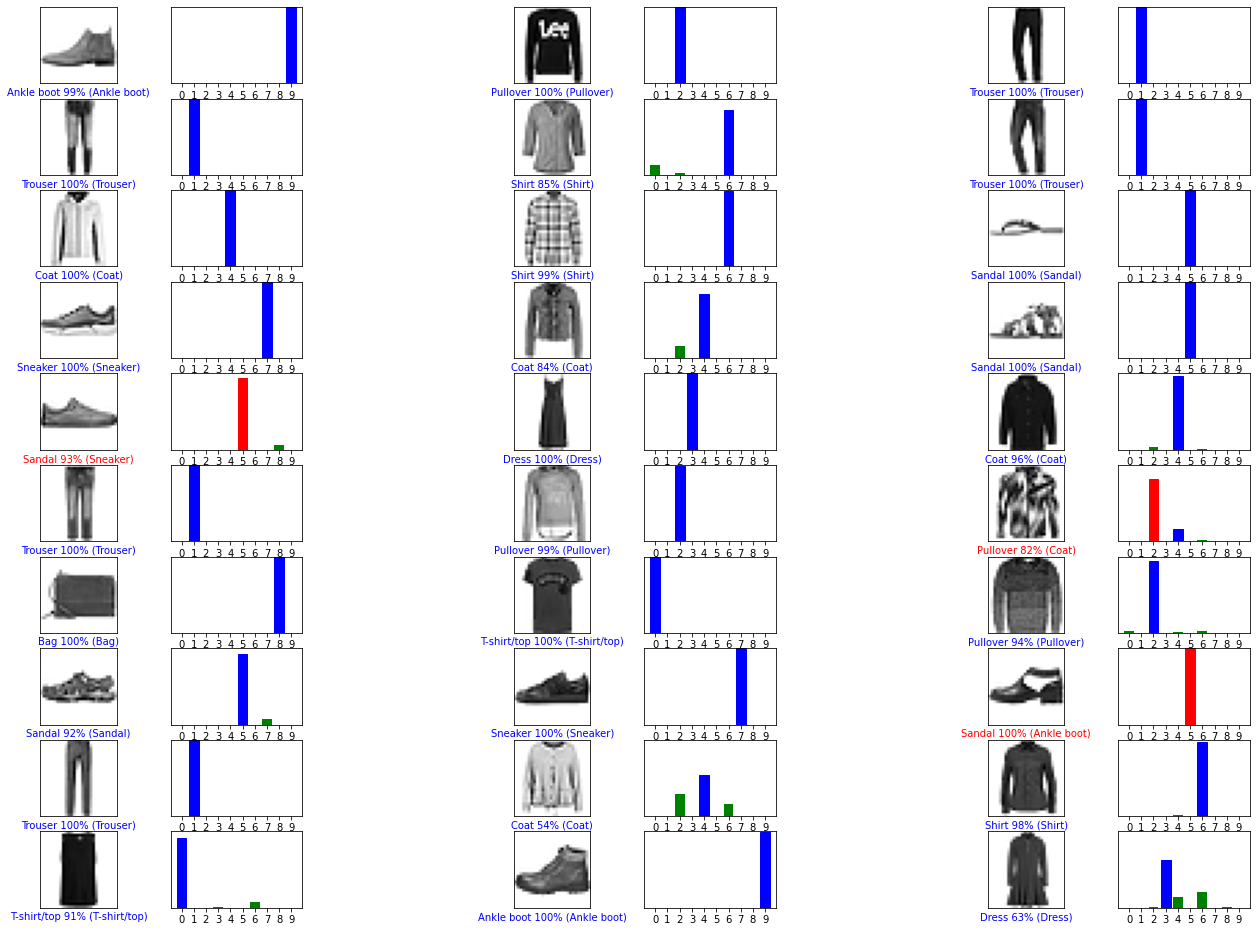

In [29]:
plt.figure(figsize=(25,25))
for i in range(30):
    plt.subplot(3*5,3*3,3*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(3*5,3*3,3*i+2)
    plot_value_array(i, predictions[i], test_labels)

**Finally, use the trained model to make a prediction about a single image.**

In [30]:
# Using the trained model
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

img.shape

(1, 28, 28)

**Now predict the correct label for the image**

In [32]:
predictions_single = probability_model.predict(img)

predictions_single

array([[3.4871834e-04, 5.6629367e-17, 9.9823594e-01, 6.5427380e-10,
        4.7572851e-04, 5.6373504e-13, 9.3965407e-04, 7.0473866e-21,
        3.7133970e-11, 4.8327894e-16]], dtype=float32)

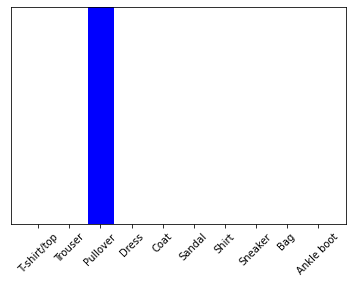

In [33]:
plot_value_array(1,predictions_single[0], test_labels) 
_= plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

2

In [35]:
# Using the trained model
# Grab an image from the test dataset.
img = test_images[18]

print(img.shape)

(28, 28)


In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


**Now predicting the correct label for this image**

In [37]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.9947453e-07 7.8481865e-12 7.5794864e-09 1.0580315e-12 9.5969881e-09
  6.6111379e-06 7.7802945e-08 2.8061264e-09 9.9999309e-01 9.9374620e-11]]


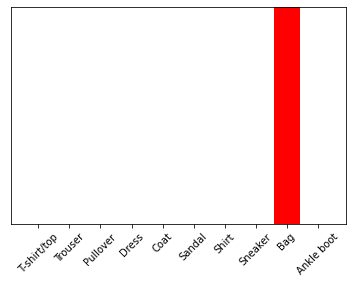

In [38]:
plot_value_array(1,predictions_single[0], test_labels) 
_= plt.xticks(range(10), class_names, rotation=45)